In [1]:
# Loading Library
import pandas as pd
import os
import matplotlib as mtp
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from fancyimpute import KNN 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from random import randrange, uniform
%matplotlib inline

C:\Users\YOGESH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\YOGESH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Setting Working Directory

In [6]:
import os
os.chdir("D:\Edvisor\Project\Cab Prediction")


# Loading Of Train And Test Data

In [7]:
data_train=pd.read_csv("train_cab.CSV",sep=',')
print("Training Data Shape :", data_train.shape)
data_test=pd.read_csv("test.CSV",sep=',')
print("Test Data Shape :", data_test.shape)

Training Data Shape : (16067, 7)
Test Data Shape : (9914, 6)


In [9]:
print(data_train.columns)
print(data_test.columns)

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')
Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [17]:
data_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [12]:
data_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
print("\n Training Set Columns Type\n  ",data_train.dtypes)
print("\n Test Set Columns Type\n  ",data_test.dtypes)


 Training Set Columns Type
   fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

 Test Set Columns Type
   pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [6]:
# Function for changing date data types of training and test data
def convert_date_type(data):
    data["pickup_datetime"] = data["pickup_datetime"].str.replace(" UTC","")
    data['pickup_datetime'] = data['pickup_datetime'].astype('datetime64[ns]') 
    return data



In [7]:
data_train=convert_date_type(data_train)
print("Traing Set ",data_train.dtypes )
print("---------------------------------")
data_test=convert_date_type(data_test)
print("Test Set ",data_test.dtypes )

Traing Set  fare_amount                  object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object
---------------------------------
Test Set  pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object


In [8]:
# Some changes in training set data types
data_train['fare_amount']=   pd.to_numeric(data_train['fare_amount'], errors='coerce')


In [19]:
# Descriptive summary
data_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [20]:
data_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [9]:
# Checking For Zero in Training Dataset
data_zero=pd.DataFrame(data_train==0)
data_zero.sum()

fare_amount            1
pickup_datetime        0
pickup_longitude     315
pickup_latitude      315
dropoff_longitude    314
dropoff_latitude     312
passenger_count       57
dtype: int64

In [10]:
# Checking For Zero in Test Dataset
# No Zero in Test Data
data_zero=pd.DataFrame(data_test==0)
data_zero.sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
#replace 0'with null values
col = ['pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude','passenger_count']
for i in col :
    data_train[i] = data_train[i].replace(0,np.nan)
    

# Missing Value Analysis

In [12]:
# Lets check Missing Value Of Training and Test set
# Creating Dataframe to check Missing Values in each columns : Training Set
missing_val=pd.DataFrame(data_train.isnull().sum())
missing_val



,0
fare_amount,25
pickup_datetime,0
pickup_longitude,315
pickup_latitude,315
dropoff_longitude,314
dropoff_latitude,312
passenger_count,112


In [13]:
# Creating Dataframe to check Missing Values in each columns : Test Set
# No Missing Value in Test Data
missing_val=pd.DataFrame(data_test.isnull().sum())
missing_val


,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [14]:
# Replacing Na with Mean and Median : Training Set
data_train['fare_amount'] =data_train['fare_amount'].fillna(data_train['fare_amount'].median())
data_train['pickup_longitude'] =data_train['pickup_longitude'].fillna(data_train['pickup_longitude'].mean())
data_train['pickup_latitude'] =data_train['pickup_latitude'].fillna(data_train['pickup_latitude'].mean())
data_train['dropoff_longitude'] =data_train['dropoff_longitude'].fillna(data_train['dropoff_longitude'].mean())
data_train['dropoff_latitude'] =data_train['dropoff_latitude'].fillna(data_train['dropoff_latitude'].mean())
data_train['passenger_count'] =data_train['passenger_count'].fillna(data_train['passenger_count'].mean())
data_train['passenger_count'] = data_train['passenger_count'].astype(int)


#data_train['Distance'] =data_train['Distance'].fillna(data_train['Distance'].mean())

In [15]:
data_train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int32
dtype: object

# Outliers Detection

In [16]:
data_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16067.000000,16067.000000
mean,15.004867,-73.911859,40.712919,-73.906698,40.688014,2.629987
std,430.125975,2.625243,3.839356,2.676370,2.598931,60.739600
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [17]:
# In a fare amount we can see some Negative data, which is not possible 
#and there is huge difference between maximum and and 75 percentile of data
# Lets check fare less than zero and fare amount more than 99 percentile
check=data_train[ (data_train["fare_amount"] < 0 ) |
                     (data_train["fare_amount"]  >  
                      data_train["fare_amount"].quantile(.9999))]

check


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1015,54343.0,2015-02-27 17:03:50,-74.003319,40.727455,-73.964470,40.764378,1
1072,4343.0,2012-01-15 20:42:04,-73.976309,40.751634,-74.014854,40.709044,1
2039,-2.9,2010-03-09 23:37:10,-73.789450,40.643498,-73.788665,40.641952,1
2486,-2.5,2015-03-22 05:14:27,-74.000031,40.720631,-73.999809,40.720539,1
13032,-3.0,2013-08-30 08:57:10,-73.995062,40.740755,-73.995885,40.741357,4


In [18]:
# WE got five such values, Lets drop those values
data_train = data_train[ (data_train["fare_amount"] > 0 ) &
                     (data_train["fare_amount"]  <  
                      data_train["fare_amount"].quantile(.9999))]

In [19]:
data_test["passenger_count"].describe()

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [20]:
# passenger_count of training set seems to contain huge amount of outliers , where maximum is 5347, in a test data maximum passenger count is only six

check=data_train["passenger_count"]>6 
check.sum()
data_train["passenger_count"].value_counts()


1       11255
2        2434
5        1045
3         676
4         328
6         302
43          2
53          2
554         1
456         1
536         1
345         1
537         1
58          1
354         1
535         1
35          1
87          1
531         1
5345        1
236         1
5334        1
557         1
55          1
0           1
Name: passenger_count, dtype: int64

In [21]:
# let's replace passenger_count more than 6 and less than 1 with mean
p_mean=data_train['passenger_count'].mean()
data_train.loc[data_train.passenger_count > 6, 'passenger_count'] =p_mean
# As passenger values cannot be float change it to int
data_train['passenger_count'] = data_train['passenger_count'].astype(int) 
data_train["passenger_count"].value_counts()


1    11255
2     2454
5     1045
3      676
4      328
6      302
0        1
Name: passenger_count, dtype: int64

In [22]:
data_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


In [23]:
# Function For Extracting Year ,Month,Day,Hour from date column
def extract_date(data):
    data['pickup_datetime']  = pd.to_datetime(data['pickup_datetime'], format= "%Y-%m-%d %H:%M:%S.%f")
    data["year"]  = pd.DatetimeIndex(data["pickup_datetime"]).year
    data["month"] = pd.DatetimeIndex(data["pickup_datetime"]).month
    data["weekday"] = data["pickup_datetime"].dt.weekday_name
    data["day"] = data["pickup_datetime"].dt.day
    data["hour"]= data["pickup_datetime"].dt.hour 
    return data



In [24]:
data_train=extract_date(data_train)
data_test=extract_date(data_test)


In [25]:
data_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,Monday,15,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,Tuesday,5,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,Thursday,18,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,Saturday,21,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,Tuesday,9,7


In [26]:
data_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,Tuesday,27,13
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,Tuesday,27,13
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,Saturday,8,11
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,Saturday,1,21
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,Saturday,1,21


In [27]:
data_test.describe()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,13.467420
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,6.868584
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,8.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,15.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,19.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,23.000000


In [29]:
data_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,13.467420
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,6.868584
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,8.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,15.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,19.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,23.000000


In [30]:
# We can see lots of outlier in co-ordinate in training set,lets treat it acc. to test set

print("Minimum Longitude of test data :",min(data_test.pickup_longitude.min(), data_test.dropoff_longitude.min()))
print("Maximum Longitude of test data :",max(data_test.pickup_longitude.max(), data_test.dropoff_longitude.max()))
print("Minimum Latitude of test data :",min(data_test.pickup_latitude.min(), data_test.dropoff_latitude.min()))
print("Maximum Latitude of test data :",max(data_test.pickup_latitude.max(), data_test.dropoff_latitude.max()))

Minimum Longitude of test data : -74.263242
Maximum Longitude of test data : -72.986532
Minimum Latitude of test data : 40.568973
Maximum Latitude of test data : 41.709555


In [31]:
Testdata_boundaries={'min_long':-74.263242,'min_lati':40.573143,'max_long':-72.986532, 'max_lati':41.709555}
# We will Check train data within these boundaries,rest we will consider as outliers



In [32]:
outlier=data_train.loc[~((data_train.pickup_longitude >= Testdata_boundaries['min_long'] ) & (data_train.pickup_longitude <= Testdata_boundaries['max_long']) &
            (data_train.pickup_latitude >= Testdata_boundaries['min_lati']) & (data_train.pickup_latitude <= Testdata_boundaries['max_lati']) &
            (data_train.dropoff_longitude >= Testdata_boundaries['min_long']) & (data_train.dropoff_longitude <= Testdata_boundaries['max_long']) &
            (data_train.dropoff_latitude >=Testdata_boundaries['min_lati']) & (data_train.dropoff_latitude <= Testdata_boundaries['max_lati'])),'outlier_check']=1
not_outlier=data_train.loc[((data_train.pickup_longitude >= Testdata_boundaries['min_long'] ) & (data_train.pickup_longitude <= Testdata_boundaries['max_long']) &
            (data_train.pickup_latitude >= Testdata_boundaries['min_lati']) & (data_train.pickup_latitude <= Testdata_boundaries['max_lati']) &
            (data_train.dropoff_longitude >= Testdata_boundaries['min_long']) & (data_train.dropoff_longitude <= Testdata_boundaries['max_long']) &
            (data_train.dropoff_latitude >=Testdata_boundaries['min_lati']) & (data_train.dropoff_latitude <= Testdata_boundaries['max_lati'])),'outlier_check']=0

print("Lets Check Outliers")
print(data_train['outlier_check'].value_counts())

# drop outliers
data_train=data_train.loc[data_train['outlier_check']==0]
data_train.drop(['outlier_check'],axis=1,inplace=True)

Lets Check Outliers
0.0    16033
1.0       28
Name: outlier_check, dtype: int64


In [33]:
data_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
count,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.00000
mean,11.338209,-73.973503,40.750621,-73.972458,40.750676,1.652342,2011.717458,6.263831,15.666188,13.50053
std,10.682807,0.041613,0.031449,0.039777,0.034075,1.260984,2.526038,3.448780,8.684110,6.51972
min,0.010000,-74.181602,40.604462,-74.183955,40.574652,0.000000,1796.000000,1.000000,1.000000,0.00000
25%,6.000000,-73.992150,40.735027,-73.991181,40.734855,1.000000,2010.000000,3.000000,8.000000,9.00000
50%,8.500000,-73.981702,40.752685,-73.980185,40.753635,1.000000,2012.000000,6.000000,16.000000,14.00000
75%,12.500000,-73.966896,40.767427,-73.963670,40.768050,2.000000,2013.000000,9.000000,23.000000,19.00000
max,453.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,2015.000000,12.000000,31.000000,23.00000


In [34]:
# Lets Calcute Distance From Cordinate
def distance(data):
    pickup_latitude  = np.radians(data["pickup_latitude"])
    pickup_longitude  = np.radians(data["pickup_longitude"])
    dropoff_latitude = np.radians(data["dropoff_latitude"])
    dropoff_longitude = np.radians(data["dropoff_longitude"])
    dlon=dropoff_longitude-pickup_longitude
    dlat=dropoff_latitude-pickup_latitude

    a = (np.sin(dlat/2))**2 + np.cos(pickup_latitude)*np.cos(dropoff_latitude)*(np.sin(dlon/2))**2
    c = 2 * np.arctan2( np.sqrt(a), np.sqrt(1-a) )
    R = 6373.0
    d = R * c 
    data["Distance"] = d
    return data


In [35]:
data_train=distance(data_train)
data_test=distance(data_test)


In [36]:
data_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,Distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,Monday,15,17,1.031088
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,Tuesday,5,16,8.452786
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,Thursday,18,0,1.389961
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,Saturday,21,4,2.800149
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,Tuesday,9,7,1.999784


In [37]:
# Dropping Unwanted Column
data_train.drop(['pickup_datetime'],axis=1,inplace=True)
data_test.drop(['pickup_datetime'],axis=1,inplace=True)

In [38]:
data_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,Distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,Tuesday,27,13,2.323989
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,Tuesday,27,13,2.426114
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,Saturday,8,11,0.618822
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,Saturday,1,21,1.961648
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,Saturday,1,21,5.388992


In [39]:
data_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,Distance
count,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.000000,16033.00000,16033.000000
mean,11.338209,-73.973503,40.750621,-73.972458,40.750676,1.652342,2011.717458,6.263831,15.666188,13.50053,3.365044
std,10.682807,0.041613,0.031449,0.039777,0.034075,1.260984,2.526038,3.448780,8.684110,6.51972,4.072328
min,0.010000,-74.181602,40.604462,-74.183955,40.574652,0.000000,1796.000000,1.000000,1.000000,0.00000,0.000000
25%,6.000000,-73.992150,40.735027,-73.991181,40.734855,1.000000,2010.000000,3.000000,8.000000,9.00000,1.270558
50%,8.500000,-73.981702,40.752685,-73.980185,40.753635,1.000000,2012.000000,6.000000,16.000000,14.00000,2.214755
75%,12.500000,-73.966896,40.767427,-73.963670,40.768050,2.000000,2013.000000,9.000000,23.000000,19.00000,3.841644
max,453.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,2015.000000,12.000000,31.000000,23.00000,101.126355


In [40]:
# Still There is an outliers in Year
# Checking Year Column
year_mode=data_train['year'].mode()
data_train.loc[data_train.year < 2000, 'year'] =year_mode


# Visualization

In [40]:
# Let Us Check Average Fare of Pick Up Latitude and Longitude
pickup_fare_amount=data_train.groupby(['pickup_latitude','pickup_longitude'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare'})
pickup_fare_amount.head(50)


,pickup_latitude,pickup_longitude,avg_fare
0,40.604462,-73.780495,5.50
1,40.609495,-74.089848,7.70
2,40.614803,-73.943923,5.50
3,40.616788,-73.928838,12.50
4,40.619563,-73.960442,8.50
5,40.620580,-74.102257,25.30
6,40.624708,-73.998720,2.50
7,40.634577,-73.912872,10.90
8,40.638730,-73.785859,2.50
9,40.639497,-73.968822,6.50


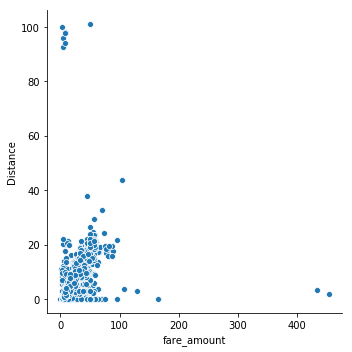

In [41]:
# Some What Positive 
sns.relplot(x="fare_amount", y="Distance",data=data_train);

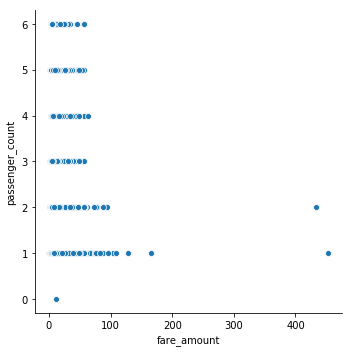

In [42]:
sns.relplot(x="fare_amount", y="passenger_count",data=data_train);

Text(0.5,1,'Fare amount (log scale) Distribution')

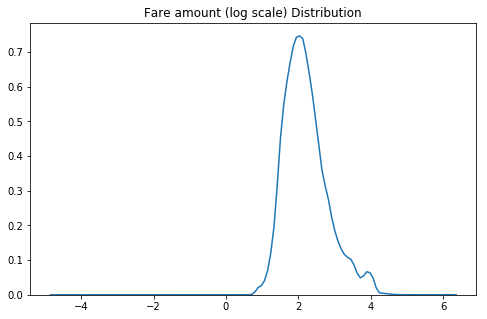

In [43]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(data_train['fare_amount'].values)).set_title("Fare amount (log scale) Distribution")


C:\Users\YOGESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5,1,'Distance (log scale) Distribution')

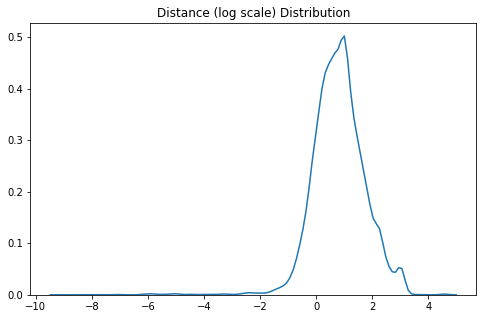

In [44]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(data_train['Distance'].values)).set_title("Distance (log scale) Distribution")


In [45]:
data_train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
year                 float64
month                  int64
weekday               object
day                    int64
hour                   int64
Distance             float64
dtype: object

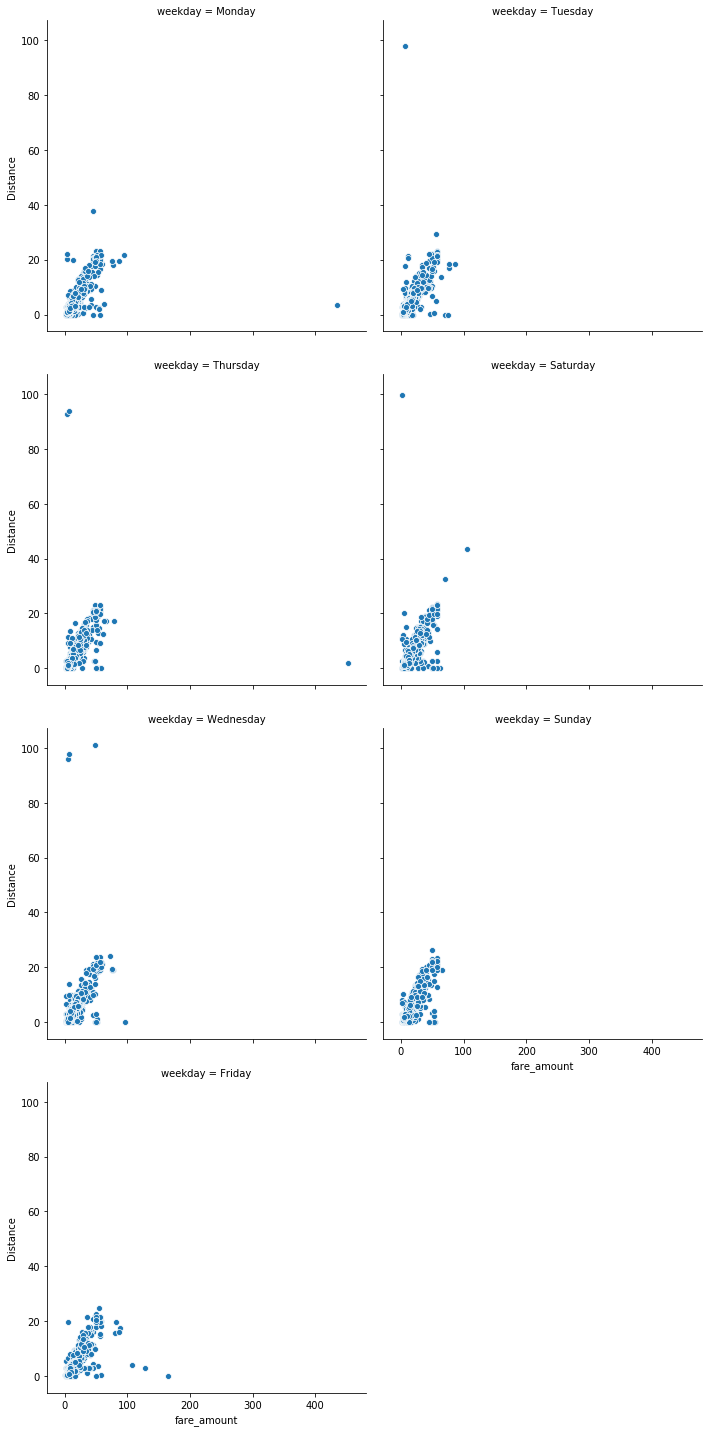

In [46]:
g = sns.relplot(x="fare_amount", y="Distance",col="weekday", col_wrap=2, data=data_train)


Text(0.5,1,'Month Wise Fare \n Depending on Year ')

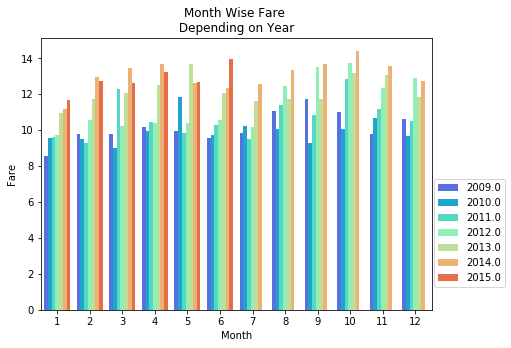

In [47]:
plt.figure(figsize=(7,5))
sns.barplot('month','fare_amount',hue='year', data=data_train,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Month')
plt.ylabel('Fare')
plt.title('Month Wise Fare \n Depending on Year ')

Text(0.5,1,'Week Day Wise Fare \n Depending on Year ')

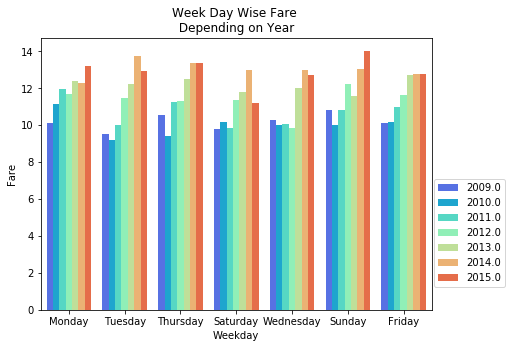

In [48]:
plt.figure(figsize=(7,5))
sns.barplot('weekday','fare_amount',hue='year', data=data_train,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Weekday')
plt.ylabel('Fare')
plt.title('Week Day Wise Fare \n Depending on Year ')

In [49]:
data_train.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,Distance
fare_amount,1.000000,0.310326,-0.157427,0.260512,-0.114186,0.003875,0.100810,0.034954,-0.007715,-0.027172,0.664246
pickup_longitude,0.310326,1.000000,0.194648,0.410978,0.110706,-0.004996,-0.006612,0.005128,0.004555,0.017444,0.463947
pickup_latitude,-0.157427,0.194648,1.000000,0.140036,0.473594,-0.007924,-0.021689,-0.002418,-0.003837,0.034520,-0.048087
dropoff_longitude,0.260512,0.410978,0.140036,1.000000,0.221186,-0.007144,-0.007788,0.014937,0.006896,-0.044475,0.341546
dropoff_latitude,-0.114186,0.110706,0.473594,0.221186,1.000000,-0.004100,-0.001162,0.005536,0.001908,0.019217,-0.049661
passenger_count,0.003875,-0.004996,-0.007924,-0.007144,-0.004100,1.000000,0.002503,0.010866,0.001768,0.018618,-0.000350
year,0.100810,-0.006612,-0.021689,-0.007788,-0.001162,0.002503,1.000000,-0.117280,-0.027060,-0.004802,0.008452
month,0.034954,0.005128,-0.002418,0.014937,0.005536,0.010866,-0.117280,1.000000,-0.015770,-0.005027,0.020018
day,-0.007715,0.004555,-0.003837,0.006896,0.001908,0.001768,-0.027060,-0.015770,1.000000,-0.001666,-0.004345
hour,-0.027172,0.017444,0.034520,-0.044475,0.019217,0.018618,-0.004802,-0.005027,-0.001666,1.000000,-0.037862


In [50]:
data_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009.0,6,Monday,15,17,1.031088
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010.0,1,Tuesday,5,16,8.452786
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011.0,8,Thursday,18,0,1.389961
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012.0,4,Saturday,21,4,2.800149
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010.0,3,Tuesday,9,7,1.999784


In [51]:

yearly_fare_amount=data_train.groupby(['year'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare'})
yearly_fare_amount.head()


,year,avg_fare
0,2009.0,10.166770
1,2010.0,9.984978
2,2011.0,10.691418
3,2012.0,11.385645
4,2013.0,12.185892


In [52]:
hour_fare_amount=data_train.groupby(['hour'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare'})
hour_fare_amount.head()


,hour,avg_fare
0,0,11.836473
1,1,12.447991
2,2,11.974455
3,3,11.482466
4,4,13.034195


In [53]:
yearly_Distance=data_train.groupby(['year'])['Distance'].mean().reset_index().rename(columns={'Distance':'avg_dist'})
yearly_Distance.head()


,year,avg_dist
0,2009.0,3.444699
1,2010.0,3.210968
2,2011.0,3.295244
3,2012.0,3.409351
4,2013.0,3.325162


In [54]:
Passenger=data_train.groupby(['passenger_count'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare'})
Passenger.head()


,passenger_count,avg_fare
0,0,11.500000
1,1,11.176800
2,2,12.185962
3,3,11.462815
4,4,11.375701


Text(0.5,1,'Passenger/Fare-amount')

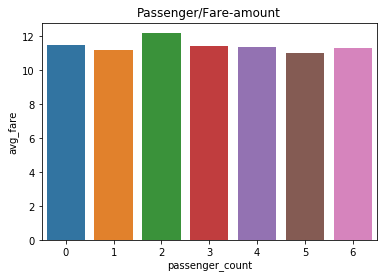

In [55]:
# Lets check How Fare Depends on Passenger Count
sns.barplot(x='passenger_count',y='avg_fare',data=Passenger).set_title("Passenger/Fare-amount")

Text(0.5,1,'Average Fare Amount over Years')

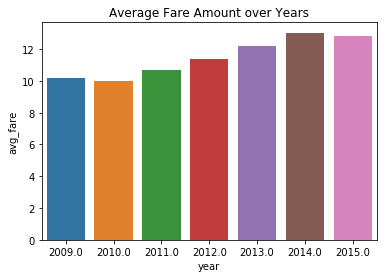

In [56]:
# Fare has increased with passing year
sns.barplot(x='year',y='avg_fare',data=yearly_fare_amount).set_title("Average Fare Amount over Years")

Text(0.5,1,'Average Fare During Pick Time')

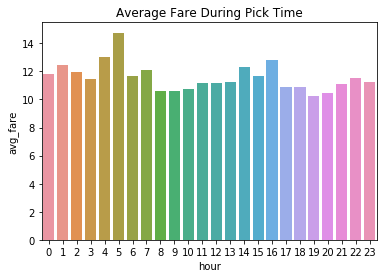

In [57]:
# Lets check fare during Peak Time
sns.barplot(x='hour',y='avg_fare',data=hour_fare_amount).set_title("Average Fare During Pick Time")

# Model Development

In [57]:
replace_map = {'weekday':{'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}}

In [58]:
data_train.replace(replace_map, inplace=True)
data_test.replace(replace_map, inplace=True)

In [59]:
data_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,Distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,2,27,13,2.323989
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,2,27,13,2.426114
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,6,8,11,0.618822
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,6,1,21,1.961648
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,6,1,21,5.388992


In [60]:
data_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009.0,6,1,15,17,1.031088
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010.0,1,2,5,16,8.452786
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011.0,8,4,18,0,1.389961
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012.0,4,6,21,4,2.800149
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010.0,3,2,9,7,1.999784


In [61]:
print(" Train Data Shape :",data_train.shape)
print(" Test Data Shape :",data_test.shape)

 Train Data Shape : (16033, 12)
 Test Data Shape : (9914, 11)


In [68]:
#Divide data into train and Validation data
train, test = train_test_split(data_train, test_size=0.2)


In [69]:
#Import libraries for LR
import statsmodels.api as sm

In [70]:
print("Train Data :", train.shape)
print("Validation Data :", test.shape)

Train Data : (12826, 12)
Validation Data : (3207, 12)


In [71]:
test.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,Distance
16052,10.00,-73.987298,40.722007,-74.000267,40.730342,5,2014.0,10,5,3,22,1.433395
7630,5.00,-73.987032,40.729602,-73.975363,40.725280,1,2014.0,2,2,11,4,1.094802
2261,35.83,-73.862539,40.769039,-73.972053,40.756959,2,2014.0,6,6,7,14,9.323591
1786,7.00,-73.978260,40.764860,-73.989850,40.746660,6,2014.0,12,0,14,3,2.247608
2274,8.10,-73.994990,40.760467,-73.970395,40.752537,1,2011.0,3,3,9,10,2.252178


# Linear Regression

In [72]:
# Train the model using the training sets
LR_fit = sm.OLS(train.iloc[:,0], train.iloc[:,1:12]).fit()

# Train the model using the training sets
#LR_fit = sm.OLS(train.iloc[:,10], train.iloc[:,0:10]).fit()




In [73]:
LR_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     5229.
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        22:34:25   Log-Likelihood:                -41911.
No. Observations:               12826   AIC:                         8.384e+04
Df Residuals:                   12815   BIC:                         8.393e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude     -7.2049      1.389     -5.189      0.000      -9.927      -4.483
pickup_latitude     -35.5871      1.900    -18.726      0.000     -39.312     -31.862
dropoff_longitude     4.1243      1.382      2.985      0.003       1.416       6.833
dropoff_latitude     -5.1990      1.806     -2.879      0.004      -8.739      -1.659
passenger_count       0.0279      0.044      0.629      0.529      -0.059       0.115
year                  0.7153      0.029     24.786      0.000       0.659       0.772
month                 0.1183      0.016      7.213      0.000       0.086       0.151
weekday               0.0054      0.028      0.193      0.847      -0.050       0.060
day                   0.0021      0.006      0.332      0.740      -0.011       0.015
hour                 -0.0031      0.009     -0.361      0.718      -0.020       0.014
Distance              1.6717      0.014    118.115      0.000       1.644       1.699
==============================================================================
Omnibus:                     6902.670   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19457395.658
Skew:                          -0.889   Prob(JB):                         0.00
Kurtosis:                     193.802   Cond. No.                     8.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# make the predictions by the model through Validation Set
predictions_LR = LR_fit.predict(test.iloc[:,1:12]) 

In [75]:
predictions_LR

16052    11.276312
7630      9.565862
2261     21.353311
1786     11.325809
2274      8.293104
13870     6.229393
10488    21.631681
15731     7.812308
5136     10.465109
10610    10.639577
12804    18.040736
7524      6.356597
7684     11.060782
14033     6.904612
582      41.434675
14640    11.254249
9082     10.153741
106      11.686702
13189    24.696482
14907     9.898554
2386     13.122940
5333     12.358867
2152      8.896479
3421     15.999969
12420     6.205281
14373     9.330680
5324      7.219018
15960    11.022694
9147     22.718819
5074      9.901208
           ...    
2334      7.868592
3593     10.333546
3760     10.797594
8785     10.204758
11156     5.715630
11921     6.625029
1980      9.952700
11255    12.833499
2629     11.393951
7073     12.809910
942       5.934122
11699    15.349778
12099     4.830335
6686      6.239807
11407     9.363388
28       14.741512
15684    10.086986
14023     8.456447
8030     10.117514
5285     11.991258
15662     7.794450
8077      7.

In [78]:
data_train.iloc[15662,0]

8.3

In [79]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [80]:
#Calculate MAPE
error=MAPE(test.iloc[:,0], predictions_LR)


In [81]:
error

30.942255283525157

In [82]:
# Result Of Linear Regression
# Accuracy=69.05
# Error 30.94
Accuracy=100-error
Accuracy

69.05774471647484

In [83]:
data_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,day,hour,Distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,2,27,13,2.323989
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,2,27,13,2.426114
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,6,8,11,0.618822
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,6,1,21,1.961648
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,6,1,21,5.388992


In [84]:
# make the predictions by the model through Test Set
predictions_LR = LR_fit.predict(data_test.iloc[:,0:11]) 

In [85]:
predictions_LR

0       10.786459
1       12.587705
2        6.634981
3        9.113749
4       13.997680
5       11.264995
6        6.068307
7       43.754714
8       13.730063
9        7.893398
10      11.084249
11      15.337371
12       5.704962
13       6.265366
14      10.635630
15      14.234399
16       7.243220
17       8.872634
18       6.715699
19       6.355364
20      12.093867
21      10.000526
22       9.977800
23      10.572933
24      16.720812
25       8.811734
26      30.871194
27      23.582243
28       8.014868
29      15.414661
          ...    
9884    35.621685
9885    16.620392
9886    19.103662
9887     8.338417
9888     6.256777
9889    12.506614
9890    11.839631
9891    16.588358
9892    11.575348
9893    12.976899
9894    13.008795
9895    23.413118
9896     9.811827
9897    14.028522
9898     7.276169
9899    17.277987
9900     9.907562
9901     9.863329
9902    14.611156
9903    12.265303
9904    36.246103
9905    22.858871
9906     9.987168
9907    22.617775
9908    11

In [197]:
# After Removing In-Significant Variables
data_train_dup=data_train.copy()
data_test_dup=data_test.copy()
data_train_dup=data_train_dup.drop(['weekday','day','hour'],axis=1)
data_test_dup=data_test_dup.drop(['weekday','day','hour'],axis=1)

In [198]:
data_train_dup.shape

(16033, 9)

In [199]:
data_train_dup.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009.0,6,1.031088
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010.0,1,8.452786
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011.0,8,1.389961
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012.0,4,2.800149
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010.0,3,1.999784


In [200]:
data_test_dup.shape

(9914, 8)

In [201]:
#Divide data into train and Validation data
train, test = train_test_split(data_train_dup, test_size=0.2)


In [202]:
# Train the model using the training sets
LR_fit1 = sm.OLS(train.iloc[:,0], train.iloc[:,1:9]).fit()
#LR_fit = sm.OLS(train.iloc[:,0], train.iloc[:,1:12]).fit()




In [203]:
LR_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     4669.
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:00:27   Log-Likelihood:                -44768.
No. Observations:               12826   AIC:                         8.955e+04
Df Residuals:                   12818   BIC:                         8.961e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude    -10.0976      1.749     -5.772      0.000     -13.527      -6.669
pickup_latitude     -34.0044      2.391    -14.223      0.000     -38.691     -29.318
dropoff_longitude     7.5267      1.753      4.294      0.000       4.091      10.963
dropoff_latitude     -2.4522      2.274     -1.078      0.281      -6.909       2.005
passenger_count       0.0312      0.055      0.562      0.574      -0.078       0.140
year                  0.6462      0.036     17.902      0.000       0.575       0.717
month                 0.1080      0.020      5.283      0.000       0.068       0.148
Distance              1.7998      0.018     98.720      0.000       1.764       1.836
==============================================================================
Omnibus:                    30999.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1114966622.622
Skew:                          24.573   Prob(JB):                         0.00
Kurtosis:                    1446.575   Cond. No.                     8.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
# make the predictions by the model through Validation Set
predictions_LR1 = LR_fit1.predict(test.iloc[:,1:9]) 

In [205]:
predictions_LR1

15760     6.998647
3514      7.435428
9473      9.834501
8544      8.271083
1227     12.056881
630       3.175122
2137     12.184184
2733      8.883634
12766     8.229293
13814    16.700143
12590     7.315728
12885    10.552173
9911      6.316760
3919     10.679579
4770     11.300306
15866     5.150493
6047      8.553782
52        8.500747
10167     9.402662
14892     6.924894
15897     5.673420
15861     6.604312
2454     26.994010
3545     40.969132
221       8.550705
13747     9.541316
6622      6.473532
12512    10.917712
14926     7.611711
14296     7.484929
           ...    
11388    10.021103
12481    13.302789
11999    22.739170
6452      5.595771
7733      9.857036
13232    34.787041
10920     8.293449
6833      7.289488
12602    14.100436
11104     9.462757
15997    10.852455
13798    13.285955
7526     11.129182
10913     9.347210
12819     7.417537
12026     8.802723
13394     6.415417
4328     15.562045
5533      8.067745
11111    10.091830
15395    11.820568
1413      6.

In [206]:
data_train.iloc[8205,0]

5.5

In [207]:
#Calculate MAPE
error=MAPE(test.iloc[:,0], predictions_LR1)
print("Error :",error)


Error : 31.56944197985701


In [208]:
# Result Of Linear Regression
# Accuracy=68.90
# Error=31.09
Accuracy=100-error
Accuracy

68.430558020143

In [210]:
# make the predictions by the model through Test Set
predictions_LR1 = LR_fit1.predict(data_test_dup.iloc[:,0:8]) 

In [211]:
predictions_LR1

0       10.502594
1       12.213674
2        6.348309
3        8.956286
4       14.257147
5       11.213857
6        5.913683
7       45.427139
8       13.838764
9        7.605343
10      10.776620
11      15.653498
12       5.500635
13       6.248937
14      10.572161
15      14.716842
16       6.807616
17       9.027465
18       6.491717
19       6.051432
20      11.483109
21       9.875244
22       9.561737
23      10.340143
24      16.742379
25       8.420122
26      32.533472
27      24.563460
28       7.746076
29      15.245146
          ...    
9884    37.274589
9885    16.897262
9886    19.891656
9887     8.184697
9888     5.881180
9889    12.126311
9890    11.652754
9891    17.201893
9892    11.650613
9893    13.551502
9894    12.959884
9895    23.915709
9896     9.673171
9897    14.186741
9898     6.958868
9899    17.622041
9900     9.740312
9901     9.596307
9902    14.615967
9903    11.932629
9904    36.660424
9905    23.987927
9906     9.283203
9907    23.099709
9908    11

# Decision Tree

In [265]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [266]:
data_train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
year                 float64
month                  int64
weekday                int64
day                    int64
hour                   int64
Distance             float64
dtype: object

In [247]:
#Divide data into train and test
#data_train = data_train.fillna(lambda x: x.median())
data_train['year'] =data_train['year'].fillna(data_train['year'].median())
data_train['year']=   pd.to_numeric(data_train['year'], errors='coerce')
data_train_dup['year'] =data_train['year'].fillna(data_train['year'].median())
data_train['year']=   pd.to_numeric(data_train['year'], errors='coerce')

#data_train['year'] = data_train['year'].astype(int)


In [267]:
train, test = train_test_split(data_train, test_size=0.2)




In [268]:
print(" Train Shape :",train.shape)
print(" Test Shape :",test.shape)


 Train Shape : (12826, 12)
 Test Shape : (3207, 12)


In [269]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=5,max_leaf_nodes=5,min_samples_leaf=10).fit(train.iloc[:,1:12],train.iloc[:,0])
#fit_DT1 = DecisionTreeRegressor(max_depth=5,max_leaf_nodes=5,min_samples_leaf=10).fit(train_1.iloc[:,1:8], train_1.iloc[:,0])

#train.iloc[:,0], 
#train.iloc[:,1:12]

In [270]:
#data_train.isnull().any()
data_train_dup.isnull().any()

fare_amount          False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
year                 False
month                False
Distance             False
dtype: bool

In [271]:
fit_DT

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [272]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,1:12])
predictions_DT

array([ 6.33502028,  9.44201272,  6.33502028, ...,  9.44201272,
        9.44201272, 14.65007863])

In [273]:
Error=MAPE(test.iloc[:,0], predictions_DT)

In [274]:
#Error :  27.485898312509104
#Accuracy : 72.51410168749089
print("Error : ",Error)
Accuracy =100-Error
print("Accuracy :",Accuracy)

Error :  27.485898312509104
Accuracy : 72.51410168749089


In [275]:
Train_X=list(train.iloc[:,1:12])
Train_X

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'year',
 'month',
 'weekday',
 'day',
 'hour',
 'Distance']

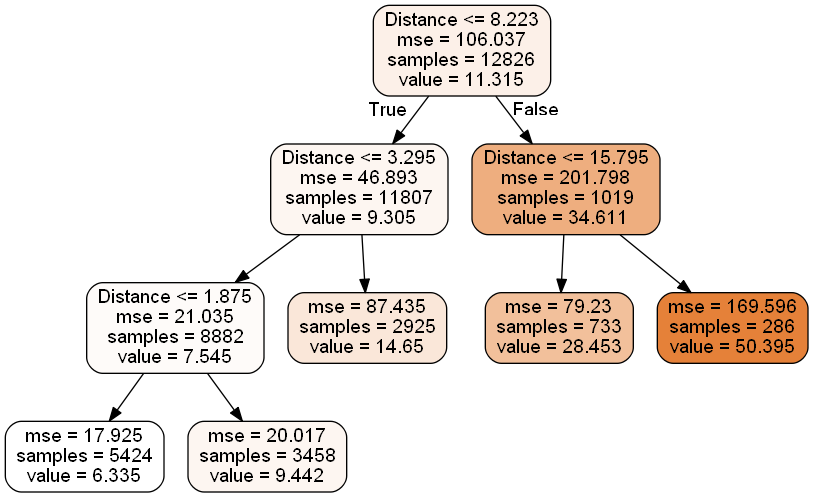

In [276]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot


dot_data=StringIO()
export_graphviz(fit_DT, out_file=dot_data,feature_names=Train_X,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [305]:
# make the predictions by the model through Test Set
predictions_DT = fit_DT.predict(data_test.iloc[:,0:11]) 

In [306]:
print(predictions_DT)

[ 9.51037647  9.51037647  6.42702298 ... 49.05292929 28.20520566
  6.42702298]


In [307]:
predictions_DT[0:30]

array([ 9.51037647,  9.51037647,  6.42702298,  9.51037647, 14.60684559,
        9.51037647,  6.42702298, 49.05292929, 14.60684559,  6.42702298,
        9.51037647, 14.60684559,  6.42702298,  6.42702298,  9.51037647,
       14.60684559,  6.42702298,  9.51037647,  6.42702298,  6.42702298,
        6.42702298,  9.51037647,  6.42702298,  9.51037647, 14.60684559,
        6.42702298, 28.20520566, 28.20520566,  6.42702298, 14.60684559])

In [308]:
#######################Random Forest ######################################


In [277]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [279]:
from sklearn.model_selection import train_test_split
X=data_train.drop(['fare_amount'],axis=1)
y=data_train['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=123)#test_size is the proportion of data that is to be kept aside for validation

In [280]:
data_train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
year                 float64
month                  int64
weekday                int64
day                    int64
hour                   int64
Distance             float64
dtype: object

In [281]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)

In [282]:
rf_pred

array([ 4.861 , 11.5817,  5.27  , ...,  8.884 ,  6.964 ,  7.644 ])

In [293]:
rf_pred1= rf.predict(data_test)
rf_pred1[0:10]

array([ 9.825 , 10.936 ,  4.319 ,  9.072 , 16.68  , 10.8877,  6.048 ,
       48.0484, 11.755 ,  6.536 ])

In [284]:
# Error 19.54
# Accuracy 80.45
Error=MAPE(rf_pred, y_test)
Error

19.545079240843453

In [285]:
Accuracy=100-Error
Accuracy

80.45492075915655

In [292]:
y_test

5607      5.0
12839    11.7
8214      3.7
8273     10.5
14001     5.7
4553     10.5
1600      7.0
10554    10.1
3681     13.7
2209     20.1
4139     15.3
15840    23.7
5657      6.5
12106     7.3
10243     9.5
1905     13.0
8719      4.9
3777      6.9
1927      8.5
2193      5.7
11195    12.0
14021     8.9
6713     10.5
2718      5.7
14203    10.1
12508    12.5
979      23.5
15609    13.5
725       4.9
8091      5.3
         ... 
1985      6.1
5560      8.1
1508      4.9
13262     6.1
12763     4.9
1657      8.0
15367    10.0
4934      7.0
1551      9.3
5467     21.0
14591     6.1
6479     12.9
6387      7.7
821       6.5
13055    24.1
14839     3.7
13409     6.9
11117     6.9
12760     4.5
13975     7.7
15169     8.9
13134     8.5
8132      5.3
9129     26.5
10851     8.9
7854      8.1
13192     5.3
4799      3.7
8293      8.1
8201      6.1
Name: fare_amount, Length: 4009, dtype: float64